## oil gas water usage study
Using data from FracFocus 

In [5]:
# %load og_forecast_xk.py
"""
Created on Tue Sep 19 18:55:23 2017

@author: Xianhui
"""
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter
import operator
%matplotlib inline
# os.getcwd()

'C:\\Users\\Xianhui\\Documents\\Python Scripts'

(301, 575)


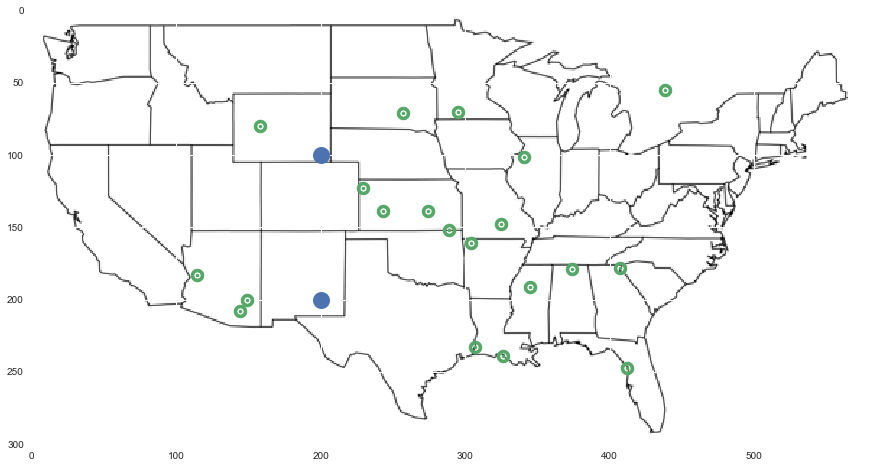

In [2]:
im = plt.imread('fig/us2.png')
rigs = np.c_[np.random.randint(111, 450, size=20),
             np.random.randint(51, 250, size=20)]
print(im.shape)
plt.figure(figsize = (20,8))
plt.imshow(im,cmap='gray')
plt.scatter([200,200],[100,200],marker='o',linewidths=10,zorder=1)
plt.scatter(rigs[:, 0], rigs[:, 1],marker='.',linewidths=10,zorder=1)
plt.show()

In [90]:
os.getcwd()
df_raw = pd.read_csv(os.path.join('./Data', 'dbo_RegistryUpload_021617.txt'),
                     nrows=130000, 
                     encoding = "ISO-8859-1",
                     parse_dates=['JobStartDate', 'JobEndDate'])

In [110]:
df = df_raw
df.head().transpose()

,0,1,2,3,4
pKey,{D9DA28B5-AA08-40F0-83E6-572A591D652B},{933CAB8F-29FF-4F94-8ACB-58119FE5AF93},{E0580A6F-DD77-45E0-B83E-593862149B85},{5DAD0540-F7A1-4F47-844A-65FA0F13B1F4},{67A16937-4A24-4FE9-B4AC-66B5B15EEB36}
JobStartDate,4/20/2011 0:00:00,7/18/2011 0:00:00,5/5/2011 0:00:00,11/1/2011 0:00:00,4/29/2011 0:00:00
JobEndDate,4/20/2011 0:00:00,7/18/2011 0:00:00,5/5/2011 0:00:00,11/1/2011 0:00:00,4/29/2011 0:00:00
APINumber,1073217340000,1073217580000,1073217360000,1125260840000,1073217290000
StateNumber,1,1,1,1,1
CountyNumber,73,73,73,125,73
OperatorName,Energen Resources Corporation,Energen Resources Corporation,Energen Resources Corporation,Energen Resources Corporation,Energen Resources Corporation
WellName,RGGS-11-18-05-16-16-9672,RGGS-11-18-06-16-04-9641,RGGS-11-18-05-10-11-9733,WW-11-20-08-21-13-1861,RGGS-11-18-05-11-08-9736
Latitude,33.46,33.48,33.48,33.28,33.49
Longitude,-87.05,-87.17,-87.05,-87.38,-87.02


In [111]:
df = df[df.Latitude.between(20, 50) & df.Longitude.between(-111, -65)]
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
APINumber,119402.0,3.511142e+13,1.266265e+13,4.226933e+09,3.310502e+13,4.212333e+13,4.232939e+13,4.904751e+13
StateNumber,119402.0,3.494550e+01,1.261545e+01,1.000000e+00,3.300000e+01,4.200000e+01,4.200000e+01,4.900000e+01
CountyNumber,119402.0,1.659848e+02,1.455825e+02,1.000000e+00,4.500000e+01,1.230000e+02,2.830000e+02,7.130000e+02
Latitude,119402.0,3.562935e+01,5.617751e+00,2.517000e+01,3.166000e+01,3.346000e+01,4.008000e+01,4.899000e+01
Longitude,119402.0,-9.943458e+01,7.264136e+00,-1.109100e+02,-1.032600e+02,-1.014100e+02,-9.770000e+01,-7.555000e+01
TVD,89798.0,4.923038e+04,6.415855e+06,0.000000e+00,6.391000e+03,8.248000e+03,1.069400e+04,1.185012e+09
TotalBaseWaterVolume,89776.0,4.136982e+06,5.166029e+06,0.000000e+00,7.262022e+05,2.819199e+06,6.203780e+06,5.925167e+08
TotalBaseNonWaterVolume,71902.0,1.196090e+05,2.636027e+06,-1.152589e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.028166e+08
FFVersion,119402.0,1.683984e+00,5.485511e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
FederalWell,119402.0,4.672451e-02,2.110491e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


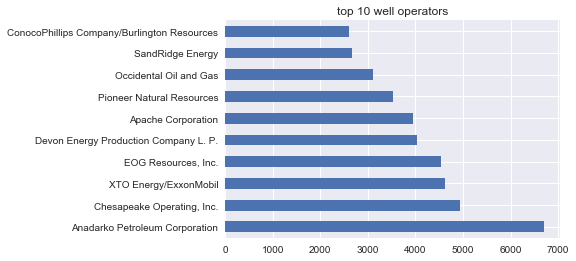

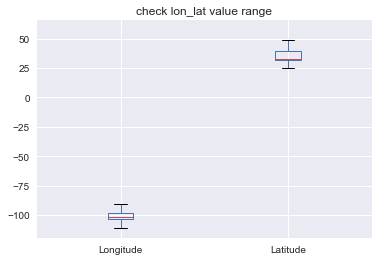

In [106]:
df.OperatorName.value_counts().nlargest(10).plot.barh(title='top 10 well operators');
df[['Longitude', 'Latitude']].plot.box(title='check lon_lat value range');
plt.scatter(df.Longitude, df.Latitude);
# pd.crosstab(df.StateNumber, df.JobEndDate.dt.year, values=df.APINumber, aggfunc='count')

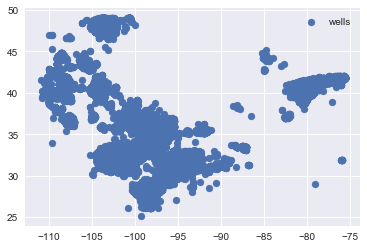

In [117]:
plt.scatter(df.Longitude, df.Latitude);
plt.legend(['wells'], loc='upper right')

### Use KMeans clustering to label wells into different group

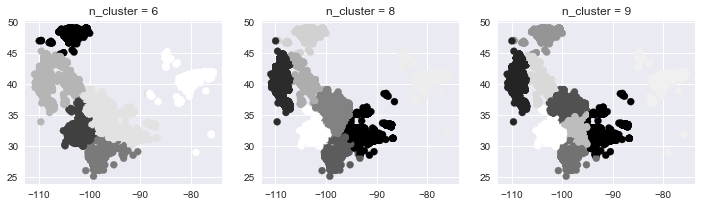

In [131]:
from sklearn.cluster import KMeans
X = df[['Longitude', 'Latitude']]
X.isnull().sum()
fig, ax = plt.subplots(1, 3, figsize=(12, 3));
for i, n_cluster in enumerate([6, 7, 8]):
    estimator = KMeans(n_clusters=n_cluster)
    estimator.fit(X)
    ax[i].scatter(X.Longitude, X.Latitude, c=estimator.labels_.astype(np.float));
    ax[i].set_title('n_cluster = ' + str(n_cluster))
# estimator.score(X)

It seems 8 clusters give reasonable grouping, assign label to dataframe  
Calculate group water usage sum, median, and well count

C:\Users\Xianhui\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


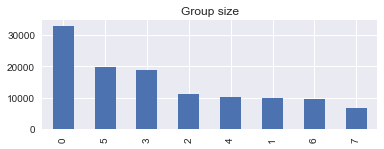

In [185]:
estimator = KMeans(n_clusters=8)
estimator.fit(X)
df.loc[:, 'Label'] = estimator.labels_
df.Label.value_counts().plot.bar(figsize=(6, 2), title='Group size');

In [151]:
def calc_agg(df):
    df_w = df.groupby('Label')[['TotalBaseWaterVolume']].agg([sum, 'median', 'count'])
    df_ll = df.groupby('Label')['Longitude', 'Latitude'].agg('mean')
    df_lon_lat = pd.merge(df_ll, df_w, left_index=True, right_index=True, how='inner')
    df_lon_lat.columns = list(s.strip() for s in 'Longitude, Latitude, \
                          TotalBaseWaterVolume_sum, \
                          TotalBaseWaterVolume_median, \
                          TotalBaseWaterVolume_count'.split(', '))
    return df_lon_lat
df_lon_lat= calc_agg(df)
df_lon_lat # .TotalBaseWaterVolume.hist(lw=0.9);

C:\Users\Xianhui\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Longitude,Latitude,TotalBaseWaterVolume_sum,TotalBaseWaterVolume_median,TotalBaseWaterVolume_count
Label,,,,,
0,-93.032506,33.499390,2.269453e+10,4766791.48,3936
1,-98.289937,35.043004,5.438209e+10,2305513.00,15517
2,-108.930223,40.194896,8.966108e+09,530525.00,7307
3,-79.093269,40.602077,6.086897e+10,7165513.00,7840
4,-102.328120,31.981941,8.754581e+10,1204077.00,25528
5,-103.064924,47.983081,2.944147e+10,2697534.50,8284
6,-98.367264,28.846994,8.502785e+10,5185278.00,15049
7,-104.751138,40.600784,2.247484e+10,3005186.00,6315


Label
0     3936
1    15517
2     7307
3     7840
4    25528
5     8284
6    15049
7     6315
Name: TotalBaseWaterVolume_count, dtype: int64

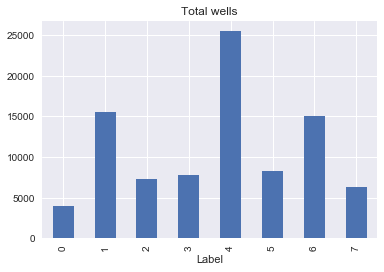

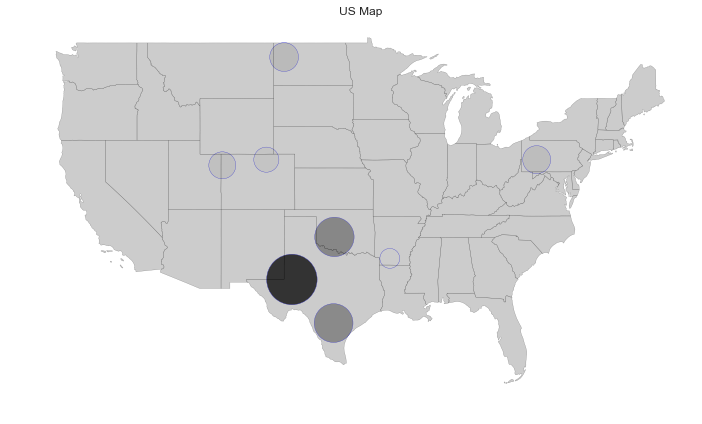

In [192]:
df_lon_lat.TotalBaseWaterVolume_count.plot.bar(title='Total wells');
plot_coord(df_lon_lat, value=(df_lon_lat.TotalBaseWaterVolume_count)/10);
(df_lon_lat.TotalBaseWaterVolume_count.transpose())

meidan water usage in wells 
 Label
0    4766791.48
1    2305513.00
2     530525.00
3    7165513.00
4    1204077.00
5    2697534.50
6    5185278.00
7    3005186.00
Name: TotalBaseWaterVolume_median, dtype: float64


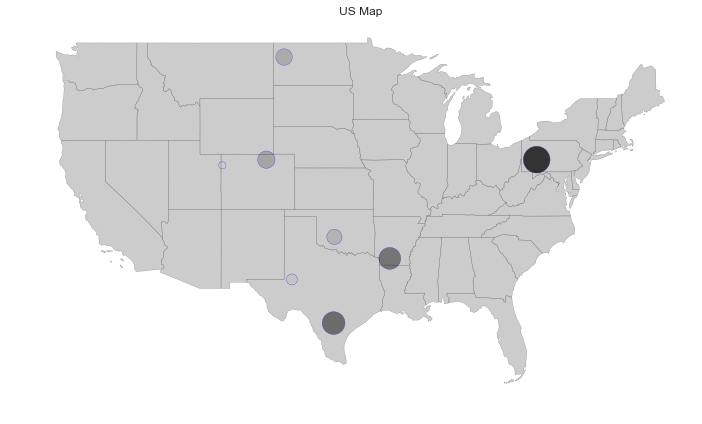

In [193]:
print('meidan water usage in wells \n', df_lon_lat.TotalBaseWaterVolume_median)
plot_coord(df_lon_lat, value=(df_lon_lat.TotalBaseWaterVolume_median)/1e4)

Total wells volume 
 Label
0    2.269453e+10
1    5.438209e+10
2    8.966108e+09
3    6.086897e+10
4    8.754581e+10
5    2.944147e+10
6    8.502785e+10
7    2.247484e+10
Name: TotalBaseWaterVolume_sum, dtype: float64


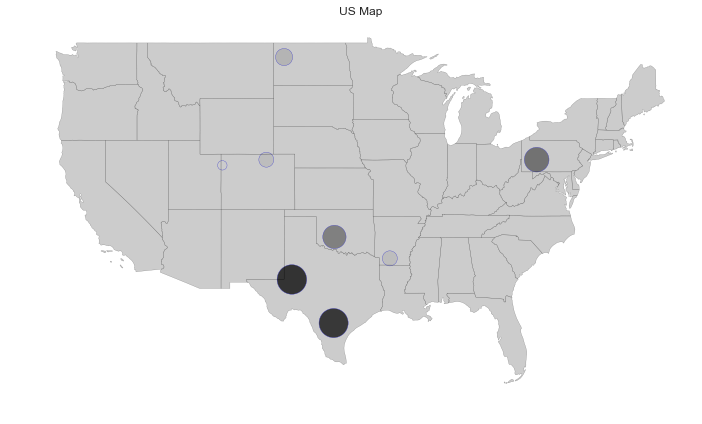

In [194]:
print('Total wells volume \n', df_lon_lat.TotalBaseWaterVolume_sum)
plot_coord(df_lon_lat, value=(df_lon_lat.TotalBaseWaterVolume_sum)/1e8)

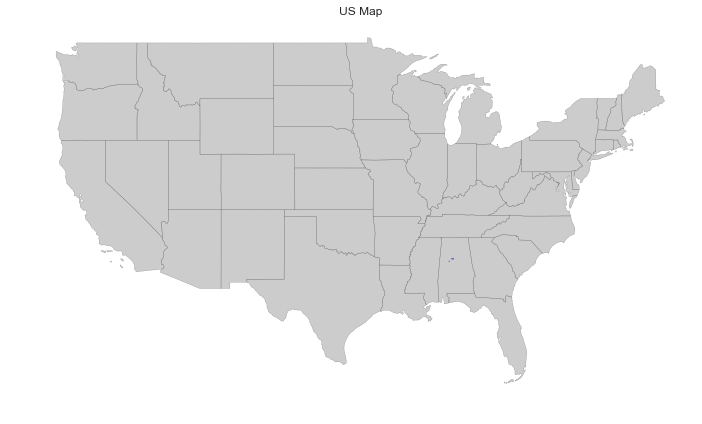

In [177]:
from shapely.geometry import Point
import geopandas as gpd
s = './Data/cb_2016_us_state_20m/cb_2016_us_state_20m.shp'
def plot_coord(df_lon_lat, value=None, shape_file=s):
    '''lon_lat: np.array [longitude, latitude]
    '''
    
    shp_point = df_lon_lat.iloc[:, 0:2].apply(lambda row: Point(row[0], row[1]), axis=1)
    shape_us = gpd.GeoDataFrame.from_file(shape_file)
    shape_us = shape_us[~shape_us.STATEFP.isin(['02', '15', '72'])]
    fig, ax = plt.subplots(1, figsize=(12,7))

    plt.title('US Map')
    # plt.legend()
    ax.axis('off')
    
plot_coord(df[['Longitude', 'Latitude']].head(), value=df['StateNumber'].head())

shape_us = gpd.GeoDataFrame.from_file('./Data/cb_2016_us_state_20m/cb_2016_us_state_20m.shp')
shape_us.plot()
df_lon_lat = df[['Longitude', 'Latitude']]
shp_point = df_lon_lat.iloc[:, 0:2].apply(lambda row: Point(row[0], row[1]), axis=1)
geo_point = gpd.GeoDataFrame({'geometry': shp_point})
geo_point.c